<a href="https://colab.research.google.com/github/vinayykkumar/Visionary-Advanced-Image-Recognition-for-the-Next-Era_Infosys_Internship_Oct2024/blob/Karthick/imgprcss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tqdm import tqdm  # For progress bar


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image  # Ensure this import
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Augmented  dataset'
train_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)
validation_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)


Found 1421 files belonging to 4 classes.
Using 1137 files for training.
Found 1421 files belonging to 4 classes.
Using 284 files for validation.


In [ ]:
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset_raw.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset_raw.map(lambda x, y: (normalization_layer(x), y))

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset_raw.class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3059 - loss: 1.5722 - val_accuracy: 0.2958 - val_loss: 1.3780
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.3505 - loss: 1.3494 - val_accuracy: 0.3204 - val_loss: 1.3668
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.3964 - loss: 1.2934 - val_accuracy: 0.3310 - val_loss: 1.3839
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4793 - loss: 1.1981 - val_accuracy: 0.3486 - val_loss: 1.3240
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5268 - loss: 1.0728 - val_accuracy: 0.4190 - val_loss: 1.3001
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5915 - loss: 0.9665 - val_accuracy: 0.4261 - val_loss: 1.3366
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6695 - loss: 0.8321 - val_accuracy: 0.4120 - val_loss: 1.7385
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7303 - loss: 0.7055 - val_accuracy: 0.4824 - val_loss: 1.6051
Epo

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy:.4f}')

model.save('/content/drive/MyDrive/Colab Notebooks/Augmented  dataset/face_recognition_model_augmented.h5')
print("Model saved successfully!")


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.4670 - loss: 3.8774


Validation accuracy: 0.4824
Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted Class: vijay


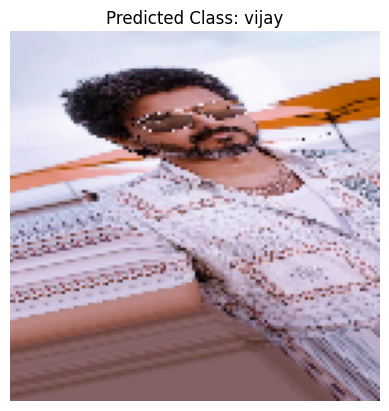

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image  # Correctly import the image module
import numpy as np
import matplotlib.pyplot as plt

# Path to the input image
img_path = '/content/drive/MyDrive/Colab Notebooks/Augmented  dataset/vijay/aug_0_1.jpg'  # Change if needed

# Preprocess the image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Predict the class of the image using the trained model
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability

# Define the class names
class_names = ['Akshay kumar', 'amitabh bachchan', 'prabhas', 'vijay']

# Get the predicted class name
predicted_class = class_names[predicted_class_index]
print(f"Predicted Class: {predicted_class}")

# Display the image with the predicted class label
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
